In [63]:
f<-function(x) {
    return (20*x*(1-x)^3*(0 <= x && x <= 1))
}

g<-function(x) {
    return (0 <= x && x <= 1)
}

cd_f<-function(x) {
    return (-20*(x^5/5 - 3*x^4/4 + x^3 - x^2/2)*(0 <= x && x<= 1))
}

C = f(0.25)  # f'(0.25) = 0

In [64]:
gen<-function() {
    while(TRUE) {
        y = runif(n = 1,min = 0,max = 1)
        p = f(y)/(C*g(y))
        print
        b = rbinom(n = 1,prob = p,size = 1)
        if(b == 1) {
            return(y)
        }
    }
}

In [65]:
N = 10000
X = rep(gen(),N)
for (i in 1:N) {
    X[i] = gen()
}

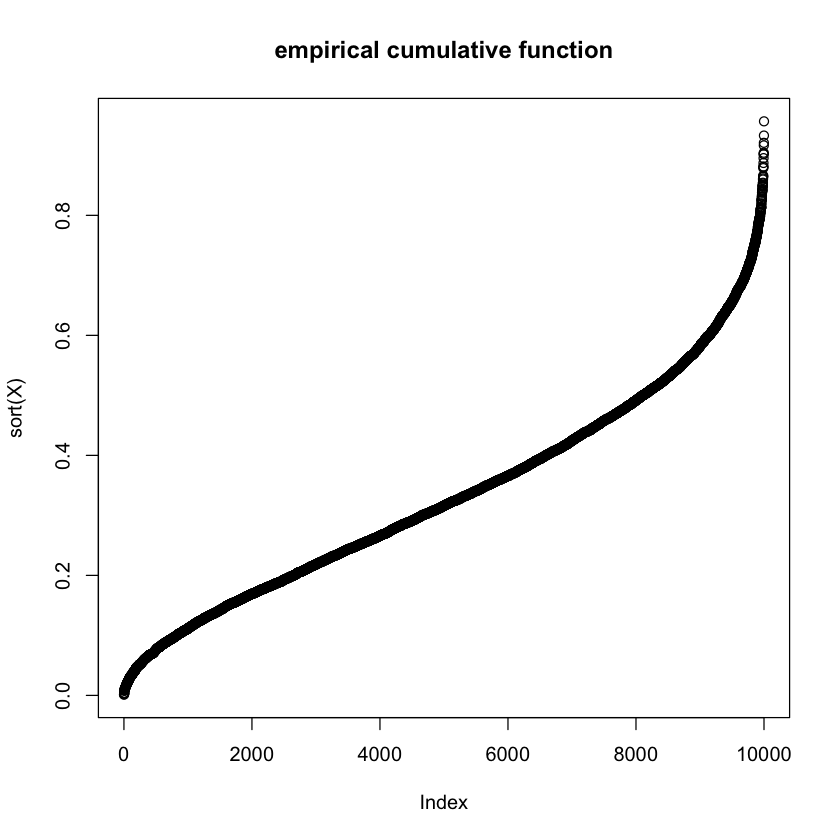

In [66]:
plot(sort(X),main='empirical cumulative function')

Проверим множественной проверкой гипотез на уровне $\alpha = 0.05$, что распределение получилось какое нужно

In [67]:
library(goftest)

In [68]:
pvals <- c( ks.test(X,cd_f)$p.value,
            ad.test(X,cd_f)$p.value,
            cvm.test(X,cd_f)$p.value)
corrected_pvals <- p.adjust(pvals, method = 'holm')
print(corrected_pvals < 0.05)

[1] FALSE FALSE FALSE


Сложная гипотеза не отвергается, поэтому считаем, что метод работает верно.

Теоретическое обоснование:

пусть Y - случайная величина полученная алгоритмом

и $\frac{f}{g} \leq C \quad (C > 1)$

$P(Y \leq x) = \sum_{k=0}^\infty  P(\#rej = k) P(acc, Y \leq x)$

rej - отвергаем, acc - принимаем величину (см описание алгоритма в задании)

${\#rej=k}$ - отвергнуть k раз подряд

$P(\#rej=k) = (1-P(acc))^k = P(rej)^k$ 

$P(rej) = 1 - P(acc)$

$P(acc) = \int \frac{f(x)}{Cg(x)} g(x) dx = \frac{1}{C}$

$P(acc, Y \leq x) = | \text{аналогично}\quad P(acc)| = \frac{F_P(x)}{C}$ 

В итоге:

$P(Y \leq x) = \sum_{k=0}^\infty (1 - \frac{1}{C})^k \frac{F_P(x)}{C} = 
\frac{1}{1 - (1 - \frac{1}{C})} \frac{F_P(x)}{C} = F_P(x)$ что и требовалось